<a href="https://colab.research.google.com/github/toohbias/W-Seminar/blob/main/Modell_AM_Modulation_Demodulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Simulation

import matplotlib.pyplot as plt
import numpy as np

## Zehnerpotenzen
milli = 1E-3
mikro = 1E-6
nano = 1E-9
piko = 1E-12

## Randwerte
dt = 5 * nano           # (s)   Zeitschritt
tf = 30 * milli         # (s)   Zeitraum

MODULATION

Resonanzfrequenz: 159.15494309189532 Hz


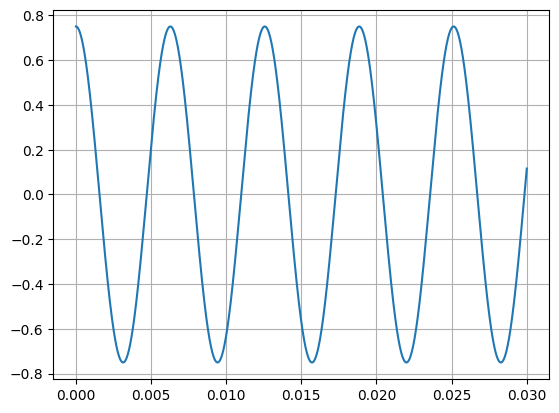

In [2]:
# NF-Schwingkreis

## Randwerte
C_nf = 1 * milli        # (F)   Kapazität
L_nf = 1 * milli        # (H)   Induktivität
R_nf = 0.0              # (Ω)   Innenwiderstand (hier: ungedämpfter Schwingkreis)

frequenz = 1 / (2 * np.pi * np.sqrt(L_nf * C_nf))
print('Resonanzfrequenz: ' + str(frequenz) + ' Hz')

## Anfangswerte
U_nf_0 = 0.75           # (V)   Nennspannung der elektrischen Quelle

### Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
I_nf = 0.0              # (A)   Es fließt noch kein Strom
Q_nf = C_nf * U_nf_0    # (C)   Ladung an der Kondensatorplatte, die mit der Quelle verbunden ist

### Zwischenvariablen
U_C_nf_arr = [U_nf_0]   # (V)   Quelle lädt zuerst den Kondensator auf
U_L_nf = 0.0            # (V)   Spule sperrt
U_R_nf = 0.0            # (V)   Schwingkreis ist ungedämpft, es fällt also keine Spannung ab!
dI_dt_nf = 0.0          # (A/s) Änderungsrate des elektrischen Stroms

## Iteration
while t[-1] < tf:
  I_nf_alt, Q_nf_alt = I_nf, Q_nf

  ## Spielregeln
  U_C_nf = Q_nf_alt / C_nf
  U_R_nf = R_nf * I_nf_alt
  U_L_nf = -(U_C_nf + U_R_nf)
  dI_dt_nf = U_L_nf / L_nf

  I_nf_neu = I_nf_alt + dI_dt_nf * dt
  Q_nf_neu = Q_nf_alt + I_nf_alt * dt

  t.append(t[-1] + dt)

  ## Zwischenschritte
  I_nf = I_nf_neu
  Q_nf = Q_nf_neu

  U_C_nf_arr.append(U_C_nf)

plt.plot(t, U_C_nf_arr)
plt.grid(True)
plt.show()

Resonanzfrequenz: 3183.098861837907 Hz


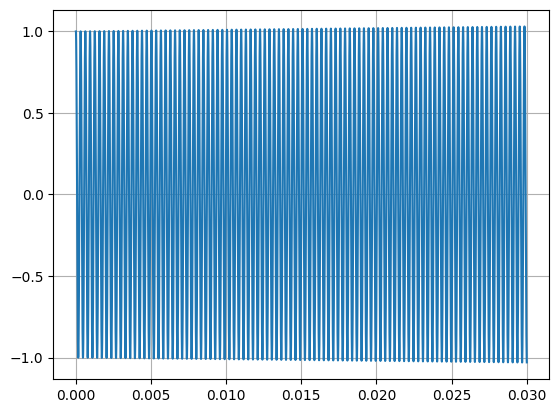

In [3]:
# HF-Schwingkreis

## Randwerte
C_hf = 50 * mikro       # (F)   Kapazität
L_hf = 50 * mikro       # (H)   Induktivität
R_hf = 0.0              # (Ω)   Innenwiderstand (hier: ungedämpfter Schwingkreis)

print('Resonanzfrequenz: ' + str(1 / (2 * np.pi * np.sqrt(L_hf * C_hf))) + ' Hz')

## Ahfangswerte
U_hf_0 = 1.0            # (V)   Nennspannung der elektrischen Quelle

### Bestandsvariablen
t = [0.0]               # (s)   Zeit (Runden der Simulation)
I_hf = 0.0              # (A)   Es fließt noch kein Strom
Q_hf = C_hf * U_hf_0    # (C)   Ladung an der Kondensatorplatte, die mit der Quelle verbunden ist

### Zwischenvariablen
U_C_hf_arr = [U_hf_0]   # (V)   Quelle lädt zuerst den Kondensator auf
U_L_hf = 0.0            # (V)   Spule sperrt
U_R_hf = 0.0            # (V)   Schwingkreis ist ungedämpft, es fällt also keine Spannung ab!
dI_dt_hf = 0.0          # (A/s) Änderungsrate des elektrischen Stroms

## Iteration
while t[-1] < tf:
  I_hf_alt, Q_hf_alt = I_hf, Q_hf

  ## Spielregeln
  U_C_hf = Q_hf_alt / C_hf
  U_R_hf = R_hf * I_hf_alt
  U_L_hf = -(U_C_hf + U_R_hf)
  dI_dt_hf = U_L_hf / L_hf

  I_hf_neu = I_hf_alt + dI_dt_hf * dt
  Q_hf_neu = Q_hf_alt + I_hf_alt * dt

  t.append(t[-1] + dt)

  ## Zwischenschritte
  I_hf = I_hf_neu
  Q_hf = Q_hf_neu

  U_C_hf_arr.append(U_C_hf)

plt.plot(t, U_C_hf_arr)
plt.grid(True)
plt.show()

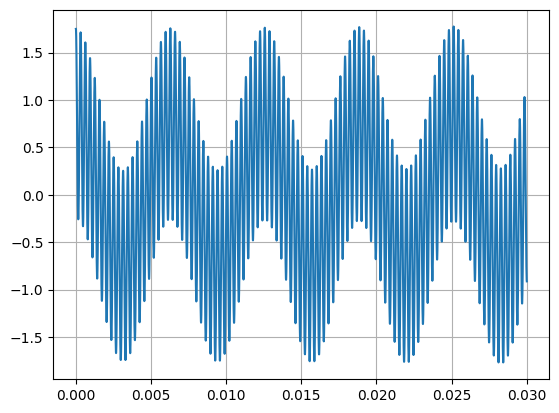

In [4]:
# Additive Modulation: Überlagerung der Wellen
U_C_zf_arr = []
for y in range(len(t)):
  U_C_zf_arr.append(U_C_nf_arr[y] + U_C_hf_arr[y])

plt.plot(t, U_C_zf_arr)
plt.grid(True)
plt.show()

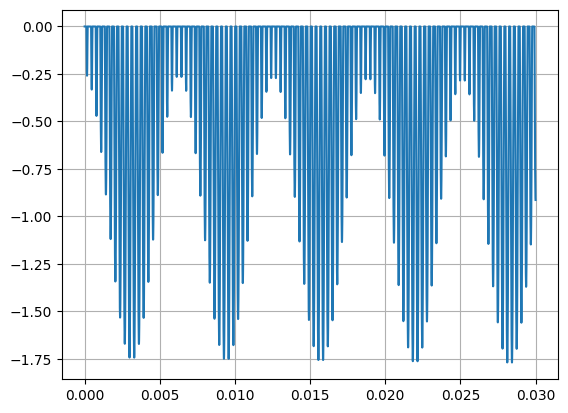

In [5]:
for y in range(len(t)):
  # Phasenverschiebung um 180°
  #U_C_zf_arr[y] = U_C_zf_arr[y] * -1

  # Abschneiden der oberen Halbwelle
  if U_C_zf_arr[y] > 0:
    U_C_zf_arr[y] = 0.0

plt.plot(t, U_C_zf_arr)
plt.grid(True)
plt.show()

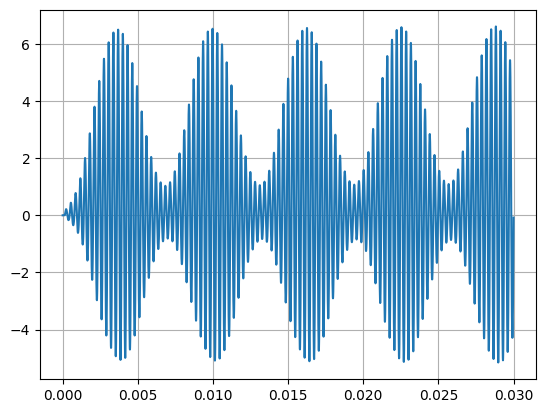

In [6]:
# Regeneration der oberen Halbwelle durch einen weiteren Schwingkreis

## Randwerte
C_am = C_hf             # Dieser Schwingkreis soll die
L_am = L_hf             # gleiche Resonanzfrequenz haben
R_am = 0.15             # wie der HF-Schwingkreis

## Anfangswerte
U_am_0 = U_C_zf_arr[0]

### Bestandsvariablen
t = [0.0]
I_am = 0.0
Q_am = C_am * U_am_0

### Zwischenvariablen
U_C_am_arr = [U_am_0]
U_L_am = 0.0
U_R_am = 0.0
dI_dt_am = 0.0

## Iteration
while t[-1] < tf:
  I_am_alt, Q_am_alt = I_am, Q_am

  ## Spielregeln
  U_C_am = Q_am_alt / C_am
  U_R_am = R_am * I_am_alt
  U_L_am = - (U_C_am + U_R_am) - U_C_zf_arr[len(t) - 1]
  dI_dt_am = U_L_am / L_am

  I_am_neu = I_am_alt + dI_dt_am * dt
  Q_am_neu = Q_am_alt + I_am_alt * dt

  t.append(t[-1] + dt)

  ## Zwischenschritte
  I_am = I_am_neu
  Q_am = Q_am_neu

  U_C_am_arr.append(U_C_am)

plt.plot(t, U_C_am_arr)
plt.grid(True)
plt.show()

DEMODULATION

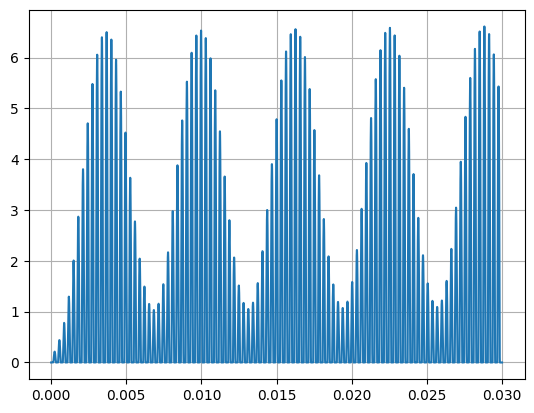

In [7]:
# AM-Signal gleichrichten
for y in range(len(t)):
  if U_C_am_arr[y] < 0:
    U_C_am_arr[y] = 0.0

plt.plot(t, U_C_am_arr)
plt.grid(True)
plt.show()

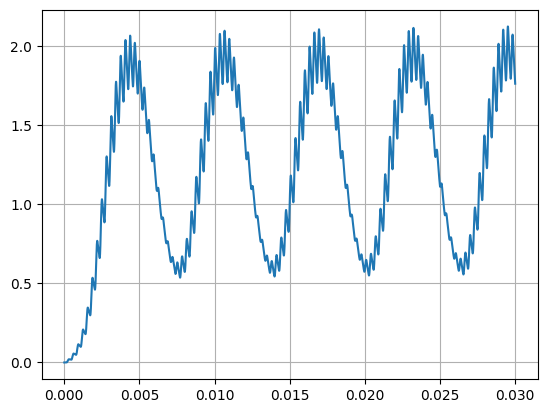

In [8]:
# Kondensator folgt der Hüllkurve

## Randwerte
C_dm = 100 * mikro      # (F)   Kapazität
R_dm = 10.0             # (Ω)   Widerstand

## Anfangswerte
U_dm_0 = U_C_am_arr[0]

### Bestandsvariablen
t = [0.0]
Q_dm = 0.0              # Kondensator ist am Anfang ungeladen

### Zwischenvariablen
U_C_dm_arr = [U_dm_0]
U_R_dm_arr = [0.0]
I_dm = 0.0

## Iteration
while t[-1] < tf:
  Q_dm_alt = Q_dm

  ## Spielregeln
  U_C_dm = Q_dm_alt / C_dm
  U_R_dm = U_C_am_arr[len(t) - 1] - U_C_dm
  I_dm = U_R_dm / R_dm

  Q_dm_neu = Q_dm_alt + I_dm * dt

  t.append(t[-1] + dt)

  ## Zwischenschritte
  Q_dm = Q_dm_neu

  U_C_dm_arr.append(U_C_dm)
  U_R_dm_arr.append(U_R_dm)

plt.plot(t, U_C_dm_arr)
plt.grid(True)
plt.show()

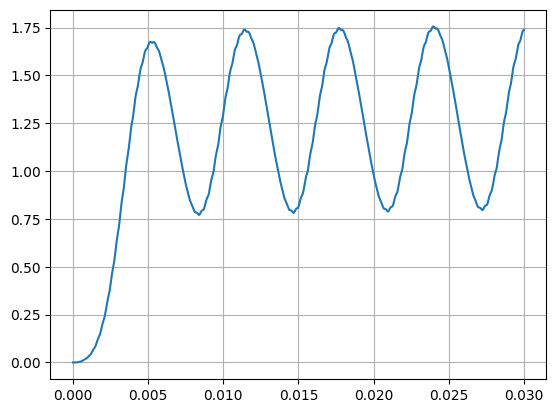

In [9]:
# Tiefpassfilter

## Randwerte
C_tp = 100 * mikro
R_tp = 10.0

## Anfangswerte
U_tp_0 = U_C_dm_arr[0]

### Bestandsvariablen
t = [0.0]
Q_tp = 0.0

### Zwischenvariablen
U_C_tp_arr = [U_tp_0]
U_R_tp_arr = [0.0]
I_tp_arr = [0.0]

## Iteration
while t[-1] < tf:
  Q_tp_alt = Q_tp

  ## Spielregeln
  U_C_tp = Q_tp_alt / C_tp
  U_R_tp = U_C_dm_arr[len(t) - 1] - U_C_tp
  I_tp = U_R_tp / R_tp

  Q_tp_neu = Q_tp_alt + I_tp * dt

  t.append(t[-1] + dt)

  ## Zwischenschritte
  Q_tp = Q_tp_neu

  U_C_tp_arr.append(U_C_tp)
  U_R_tp_arr.append(U_R_tp)
  I_tp_arr.append(I_tp)

plt.plot(t, U_C_tp_arr)
plt.grid(True)
plt.show()

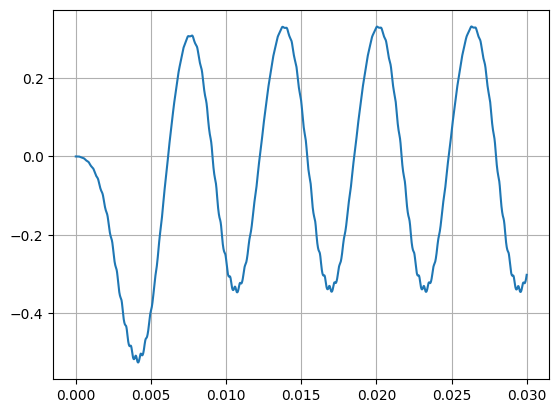

In [10]:
# Gleichspannungsanteil auskoppeln

## Randwerte
C_kp = 100 * mikro

## Anfangswerte
U_kp_0 = U_R_tp_arr[0] #- U_R_tp_arr[0]
### Wiederstand zurückrechnen
R_kp = R_tp

### Bestandsvariablen
t = [0.0]
Q_kp = 0.0

### Zwischenvariablen
U_C_kp_arr = [0.0]
U_R_kp_arr = [U_kp_0]
I_kp_arr = [0.0]

## Iteration
while t[-1] < tf:
  Q_kp_alt = Q_kp

  ## Spielregeln
  U_C_kp = Q_kp_alt / C_kp
  U_R_kp = -U_C_kp - U_R_tp_arr[len(t) - 1]
  I_kp = U_R_kp / R_kp

  Q_kp_neu = Q_kp_alt + I_kp * dt

  t.append(t[-1] + dt)

  ## Zwischenschritte
  Q_kp = Q_kp_neu

  U_C_kp_arr.append(U_C_kp)
  U_R_kp_arr.append(U_R_kp)
  I_kp_arr.append(I_kp)


plt.plot(t, U_C_kp_arr)
plt.grid(True)
plt.show()